In [32]:
# Write dependencies here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import argparse
import re
import glob
import subprocess

The dataset contains various columns related to the loyalty program, such as member information, points earned, points balance, and rewards claimed. Here's a brief overview of the columns:

1. Member Id: Unique identifier for each member.
2. Name: Member's name.
3. Email: Member's email address.
4. Birth month, Birth year, Birth day: Member's date of birth details.
5. Phone: Member's phone number.
6. Store Staff: The staff member associated with the member.
7. Member Since: The date when the member joined the loyalty program.
8. Sign up at: Where the member signed up.
9. Number of Visit: Total number of visits.
10. Last Visit: Date of the last visit.
11. Member Tier: Membership tier (e.g., Basic, Premium).
12. Points Earned: Total points earned over the lifetime of the membership.
13. Points Balance: Points balance after the event ended.
14. Total Spending: Total spending by the member.
15. Claimed Rewards: Rewards claimed by the member.
16. Category: Category of the member (e.g., New, Loyal).

To generate data-driven insights for the special anniversary event, I will analyze the data focusing on the points earned, points balance, total spending, and claimed rewards during the event period. This analysis will help to understand member engagement, spending patterns, and the overall impact of the event on the loyalty program.

Let's start the analysis by examining key statistics and distributions of the relevant columns. We will look at the distribution of points earned, points balance, total spending, and claimed rewards, as well as the relationship between these variables. Additionally, we'll explore the member tier and category distributions to understand the composition of the members who participated in the event.

In [33]:
# Assuming 'data.csv' is your dataset file
data = pd.read_csv('/workspaces/streamline-insights/data/Eber-insights-cig-cleaned.csv')

# Displaying basic statistics for numerical columns
print(data[['Points Earned', 'Points Balance', 'Total Spending', 'Claimed Rewards']].describe())

# Counting values for Member Tier and Category columns
print("\nMember Tier Counts:")
print(data['Member Tier'].value_counts())

print("\nCategory Counts:")
print(data['Category'].value_counts())


       Points Earned  Points Balance  Total Spending  Claimed Rewards
count     514.000000      514.000000      514.000000       514.000000
mean        8.926070        2.700389        1.544747         0.622568
std        12.264721        7.577007        8.345076         0.875014
min         0.000000        0.000000        0.000000         0.000000
25%         0.000000        0.000000        0.000000         0.000000
50%         7.000000        0.000000        0.000000         0.000000
75%        11.000000        3.000000        0.000000         1.000000
max       110.000000       94.000000      101.000000         4.000000

Member Tier Counts:
Member Tier
Basic    514
Name: count, dtype: int64

Category Counts:
Category
Loyal         254
New           179
Frequent       45
Infrequent     36
Name: count, dtype: int64


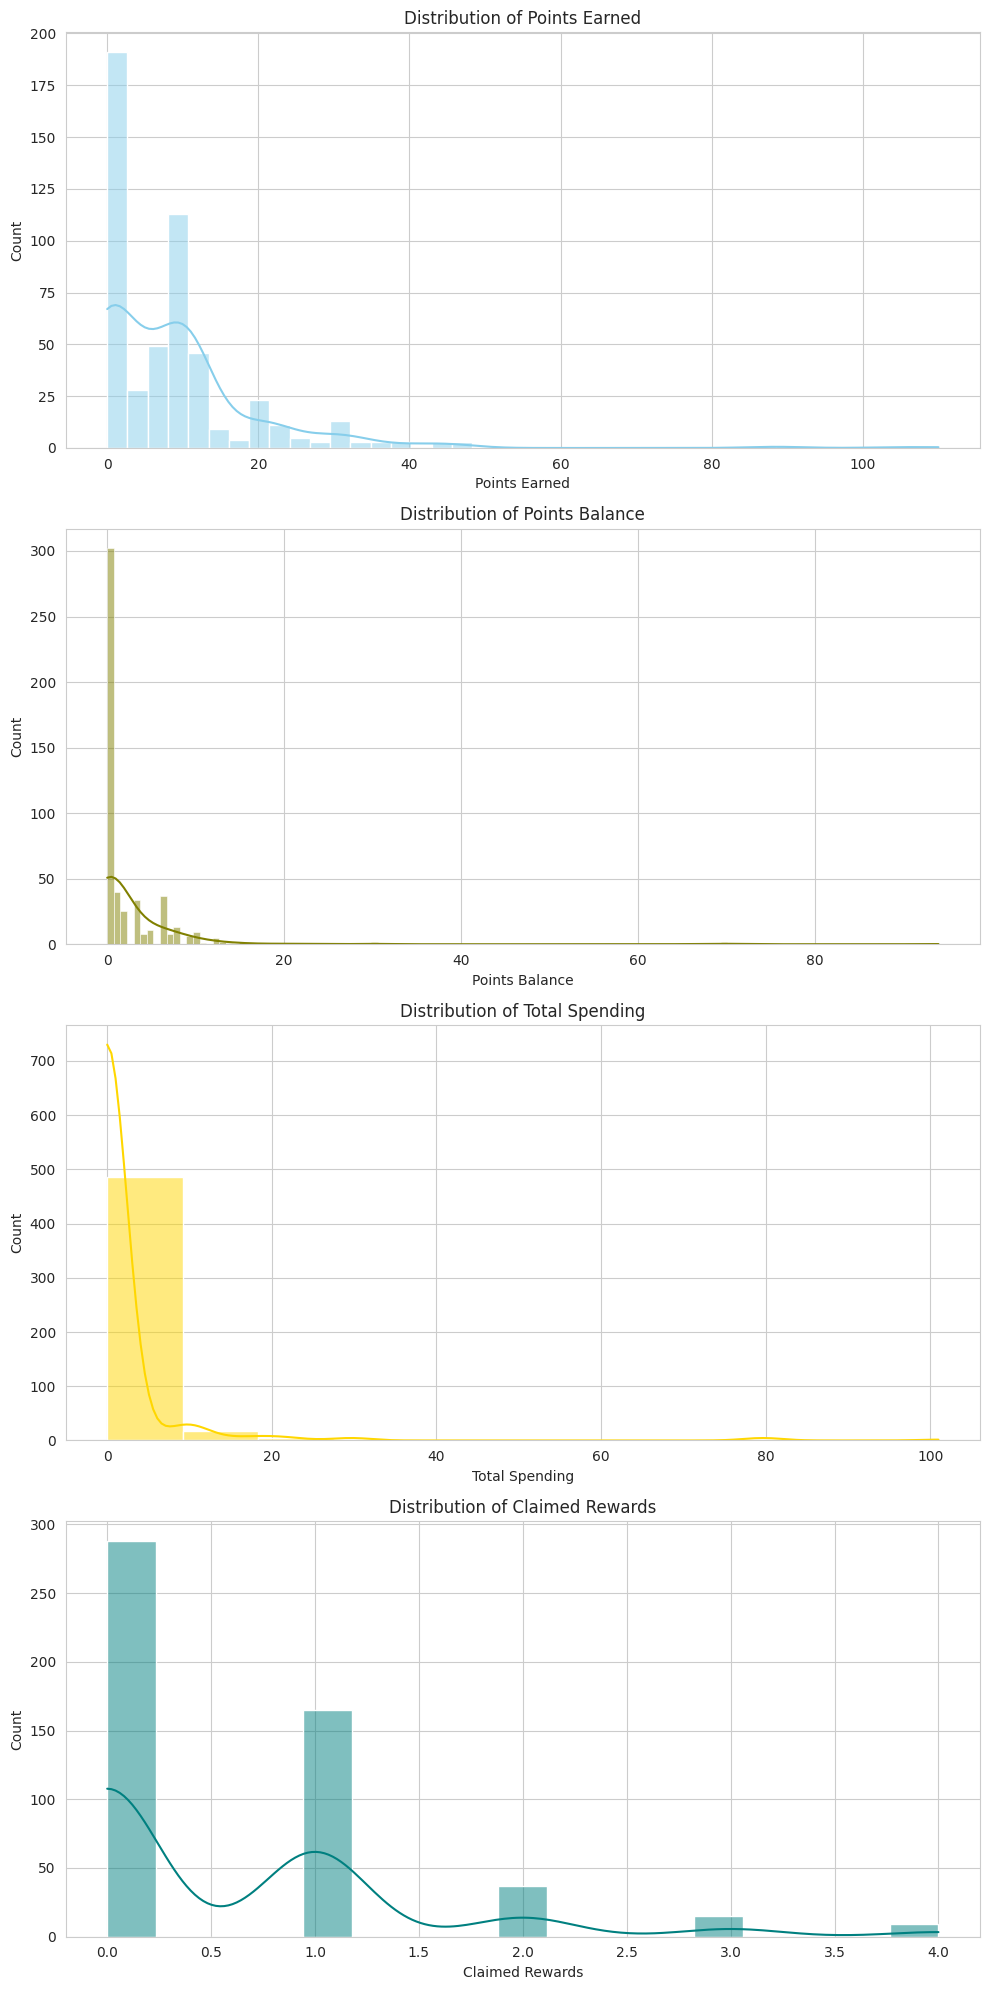

In [30]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a figure and a grid of subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

# Plotting 'Points Earned'
sns.histplot(data['Points Earned'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Points Earned')

# Plotting 'Points Balance'
sns.histplot(data['Points Balance'], kde=True, color='olive', ax=axes[1])
axes[1].set_title('Distribution of Points Balance')

# Plotting 'Total Spending'
sns.histplot(data['Total Spending'], kde=True, color='gold', ax=axes[2])
axes[2].set_title('Distribution of Total Spending')

# Plotting 'Claimed Rewards'
sns.histplot(data['Claimed Rewards'], kde=True, color='teal', ax=axes[3])
axes[3].set_title('Distribution of Claimed Rewards')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


# Distribution Analysis

The analysis of the loyalty program data reveals several key insights:

## Basic Statistics
- **Points Earned**: On average, members earned about 8.93 points with a standard deviation of 12.26. The maximum points earned by a member are 110.
- **Points Balance**: The average points balance after the event is approximately 2.70, with a standard deviation of 7.58. The maximum points balance is 94.
- **Total Spending**: Members spent an average of 1.54 MYR, with significant variation (std. dev. of 8.35). The maximum spending recorded is 101 MYR.
- **Claimed Rewards**: On average, members claimed about 0.62 rewards. The maximum number of rewards claimed is 4.

## Distributions
- The distributions of points earned, points balance, total spending, and claimed rewards are skewed to the right. This indicates that a majority of members have lower values for these variables, but there are a few members with very high values.
- It is notable that there are peaks at 0 for each of these distributions, suggesting a significant number of members did not earn points, have a points balance, spend money, or claim rewards.

## Member Composition
- All members are in the Basic tier. This indicates a uniformity in the membership tier among the participants.
- In terms of the member category, the distribution is as follows:
    - Loyal: 254 members
    - New: 179 members
    - Frequent: 45 members
    - Infrequent: 36 members

## Insights and Recommendations
1. **Member Engagement**: A large number of members have not engaged significantly (as indicated by zeros in points earned, balance, spending, and rewards). Strategies to increase engagement among these members should be considered.
2. **Spending Patterns**: The low average total spending suggests that either the members are not spending much or the event did not significantly influence their spending habits. Tailored promotions or targeted communications could be used to encourage higher spending.
3. **Reward Claiming Behavior**: To be discussed in the next section.
4. **Focus on Loyal and New Members**: The majority of participants are either loyal or new. Tailored strategies for these two groups could be effective. For example, offering exclusive rewards for loyal members to maintain their interest, and introductory offers to convert new members into frequent visitors.
For this analysis, let's choose Predicting Member Spending as our business case. We'll identify features that can potentially predict how much a member will spend in the future.

## Feature Engineering and Selection
1. **Feature Engineering**: We can create new features that might be predictive of spending, such as:

- Age of the member (derived from birth date).
- Membership duration (time since the member joined).
- Average points earned per visit.
- Reward claiming rate (claimed rewards/points earned).

2. **Feature Selection**: We will select features that are likely to influence spending, such as:

- Member Tier
- Number of Visits
- Last Visit (possibly converted to a measure of recency)
- Points Earned
- Points Balance
- Claimed Rewards
- Newly engineered features

Let's start by engineering these new features and then selecting the most relevant ones for our analysis.

The feature engineering process resulted in the addition of several new features, which could be predictive of member spending. Let's review them along with some insights from their statistics:

## Engineered Features
1. **Age**: Ranges from 1 to 73 years, with an average age of about 26 years. This might indicate a relatively young customer base.
2. **Membership Duration**: Ranges from 12 to 16 days, suggesting that the data is quite recent or covers a short period post-membership.
3. **Average Points per Visit**: Calculated as points earned per number of visits. However, there are members with zero visits, leading to infinite values in some cases.
4. **Reward Claim Rate**: The rate at which rewards are claimed based on points earned. It ranges from 0 to 0.1, indicating a low overall rate of reward claiming.

## Selected Features for Analysis
- **Member Tier**: All members are in the Basic tier.
- **Number of Visit**: Most members have 0 visits, with a maximum of 2 visits.
- **Points Earned, Balance, and Claimed Rewards**: These features are skewed, with many members having low values.
- **Total Spending**: This is our target variable for predicting future spending.

## Insights
- The low number of visits and reward claim rate indicate a need for strategies to increase engagement.
- The average age suggests targeting strategies should be tailored towards a younger demographic.
- The short membership duration indicates a potential focus on initial engagement post-membership.

## Next Steps
1. Data Cleaning: Address infinite values in 'Avg Points per Visit' and potentially transform features to better fit predictive models (e.g., log transformation for skewed features).
2. Correlation Analysis: Examine correlations between these features and total spending to identify the most predictive features.
3. Model Building: Use a regression model to predict total spending based on selected features.

# Data Cleaning

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# Converting 'Member Since' and 'Last Visit' to datetime
data['Member Since'] = pd.to_datetime(data['Member Since'])
data['Last Visit'] = pd.to_datetime(data['Last Visit'])
data['Number of Visit'] = data['Number of Visit'] + 1 # Handling division by zero by initialising zeros to 1

# Current date for the analysis
current_date = datetime.now()

# Feature Engineering
data['Age'] = current_date.year - data['Birth year']
data['Membership Duration'] = (current_date - data['Member Since']).dt.days
data['Avg Points per Visit'] = data['Points Earned'] / data['Number of Visit']
data.loc[:,'Avg Points per Visit'] = data['Avg Points per Visit'].fillna(0) # Handling division by zero
data['Avg Points per Visit'] = data['Avg Points per Visit'].replace([float('inf'), -float('inf')], 0)

# Adjusting Reward Claim Rate
data['Reward Claim Rate'] = data['Claimed Rewards'] * 10 / data['Points Earned']
data.loc[:, 'Reward Claim Rate'] = data['Reward Claim Rate'].fillna(0)
data['Reward Claim Rate'] = data['Reward Claim Rate'].replace([float('inf'), -float('inf')], 0)

# Preparing the dataset for modeling
selected_features = data[['Number of Visit', 'Last Visit', 'Points Earned', 
                          'Points Balance', 'Claimed Rewards', 'Age', 
                          'Membership Duration', 'Avg Points per Visit', 
                          'Reward Claim Rate', 'Total Spending']]

# Handling datetime feature ('Last Visit')
selected_features['Last Visit'] = (current_date - selected_features['Last Visit']).dt.days

# Check for missing values
missing_values = selected_features.isnull().sum()
print("Checking for missing values:")
print(missing_values)

Checking for missing values:
Number of Visit         0
Last Visit              0
Points Earned           0
Points Balance          0
Claimed Rewards         0
Age                     0
Membership Duration     0
Avg Points per Visit    0
Reward Claim Rate       0
Total Spending          0
dtype: int64


/tmp/ipykernel_7583/2058494690.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['Last Visit'] = (current_date - selected_features['Last Visit']).dt.days


# Correlation Analysis

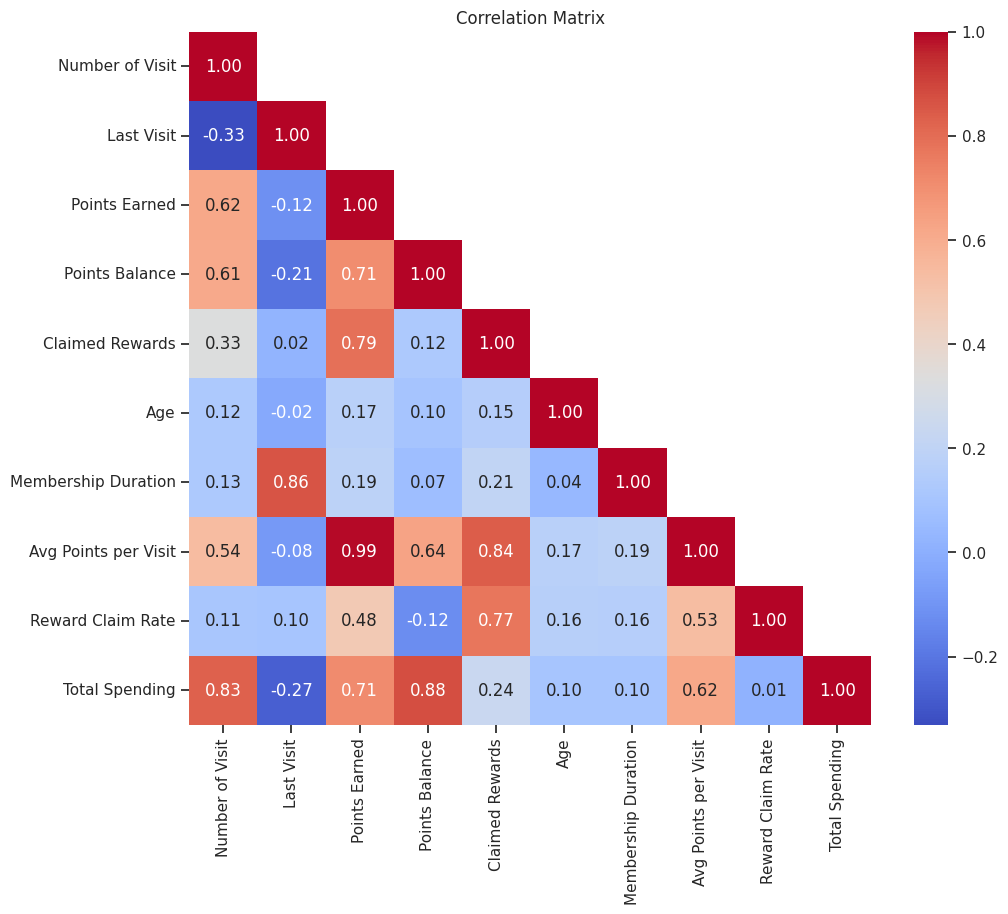

In [71]:
# Plotting correlation matrix
plt.figure(figsize=(11, 9))
mask = np.triu(np.ones_like(selected_features.corr(), dtype=bool), k=1)
sns.heatmap(selected_features.corr(), annot=True, mask=mask, cmap='coolwarm', fmt=".2f", linewidths=0)
plt.title('Correlation Matrix')
plt.show()


In [72]:
from tabulate import tabulate
selected_features.describe()
# Display summary statistics using tabulate
summary_table = selected_features.describe()
print("\nSummary Statistics of features:")
print(tabulate(summary_table, headers='keys', tablefmt='psql'))



Summary Statistics of features:
+-------+-------------------+--------------+-----------------+------------------+-------------------+-----------+-----------------------+------------------------+---------------------+------------------+
|       |   Number of Visit |   Last Visit |   Points Earned |   Points Balance |   Claimed Rewards |       Age |   Membership Duration |   Avg Points per Visit |   Reward Claim Rate |   Total Spending |
|-------+-------------------+--------------+-----------------+------------------+-------------------+-----------+-----------------------+------------------------+---------------------+------------------|
| count |        514        |   514        |       514       |        514       |        514        | 514       |            514        |              514       |          514        |        514       |
| mean  |          7.08171  |    57.9008   |         8.92607 |          2.70039 |          0.622568 |  26.249   |             57.9825   |              

In [56]:
# Splitting the dataset
X = selected_features.drop('Total Spending', axis=1)
y = selected_features['Total Spending']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance_sorted = feature_importance.sort_values(by='Coefficient', ascending=False)

print("Mean Squared Error:", mse)
print("R2:", r2)

print(feature_importance_sorted)

Mean Squared Error: 1.8761633299037859
R2: 0.8706880228752549
                Feature  Coefficient  Absolute Coefficient
2         Points Earned    16.871367             16.871367
3        Points Balance    13.913416             13.913416
4       Claimed Rewards    11.802712             11.802712
0       Number of Visit     2.327188              2.327188
1            Last Visit     2.000628              2.000628
8     Reward Claim Rate     0.654756              0.654756
5                   Age    -0.071060              0.071060
6   Membership Duration    -2.037816              2.037816
7  Avg Points per Visit   -30.859108             30.859108
